In [10]:
# 1. Import libraries
# --------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Display all columns
pd.set_option('display.max_columns', None)
# Load data
df = pd.read_csv('../data/processed/cleaned_exercise_data.csv')
print(f" Data loaded successfully with shape: {df.shape}")
df.head()


 Data loaded successfully with shape: (3864, 14)


,id,exercise,calories_burn,dream_weight,actual_weight,age,gender,duration,heart_rate,bmi,weather_conditions,exercise_intensity,calories_per_min,weight_diff
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5,7.76,-4.41
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5,7.99,3.06
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4,13.06,-0.92
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10,3.26,-3.51
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3,12.24,4.32


In [13]:
# 3. Basic info and statistics
# --------------------------------------------
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3864 non-null   int64  
 1   exercise            3864 non-null   object 
 2   calories_burn       3864 non-null   float64
 3   dream_weight        3864 non-null   float64
 4   actual_weight       3864 non-null   float64
 5   age                 3864 non-null   int64  
 6   gender              3864 non-null   object 
 7   duration            3864 non-null   int64  
 8   heart_rate          3864 non-null   int64  
 9   bmi                 3864 non-null   float64
 10  weather_conditions  3864 non-null   object 
 11  exercise_intensity  3864 non-null   int64  
 12  calories_per_min    3864 non-null   float64
 13  weight_diff         3864 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 422.8+ KB


,id,calories_burn,dream_weight,actual_weight,age,duration,heart_rate,bmi,exercise_intensity,calories_per_min,weight_diff
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298,8.259332,-0.049172
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896,4.292415,2.851799
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000,1.690000,-5.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000,5.060000,-2.530000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000,7.490000,-0.085000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000,10.512500,2.380000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000,24.870000,5.000000


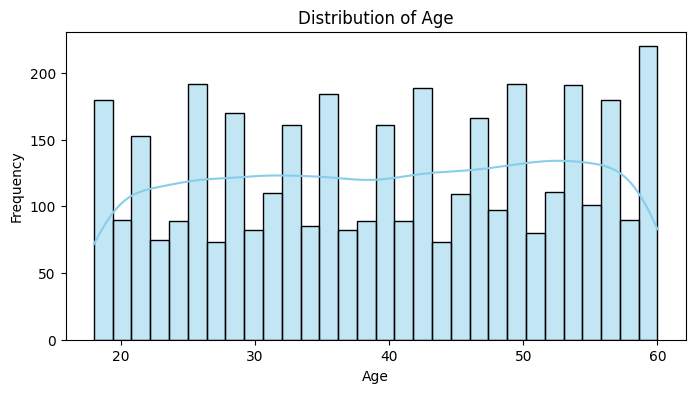

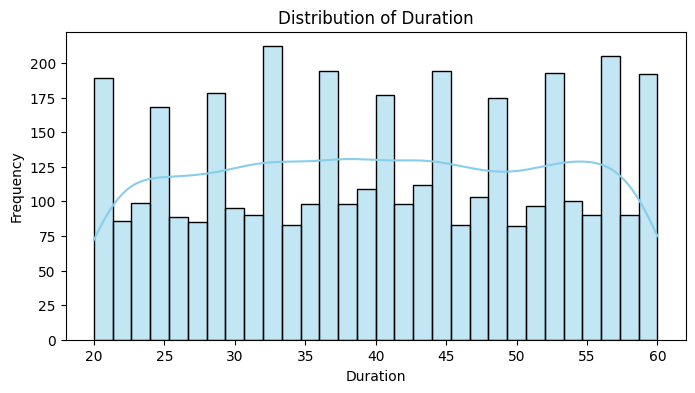

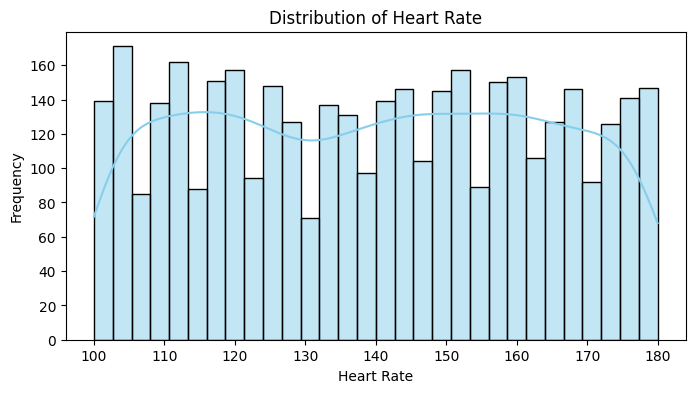

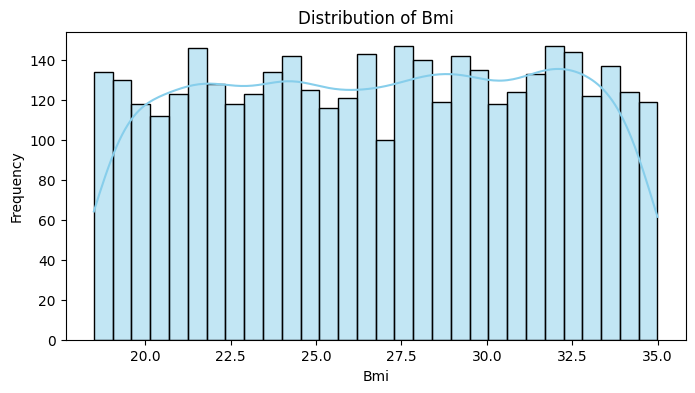

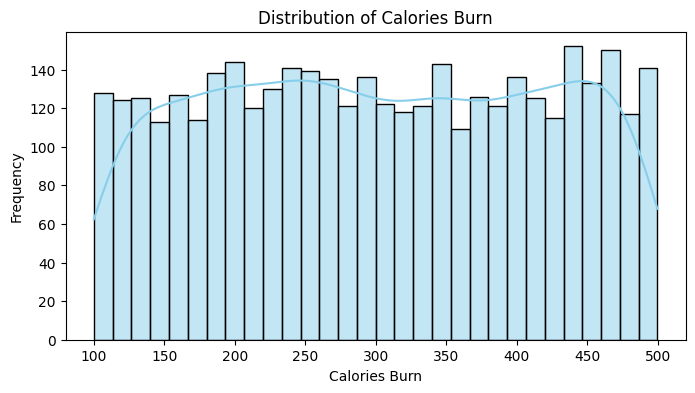

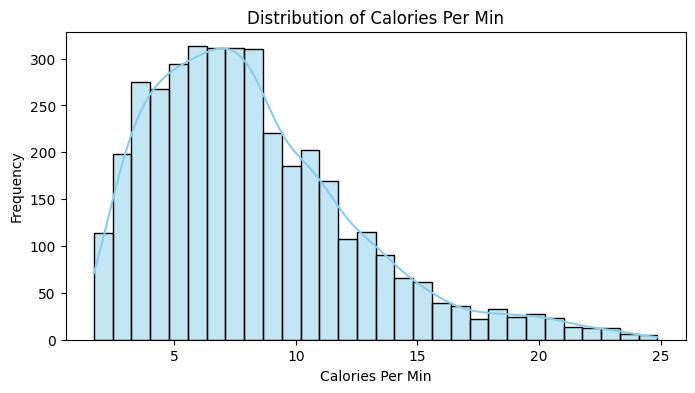

In [14]:
# 4. Distribution plots for key numeric features
# --------------------------------------------
numeric_features = ['age', 'duration', 'heart_rate', 'bmi', 'calories_burn', 'calories_per_min']

for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f"Distribution of {col.replace('_',' ').title()}")
    plt.xlabel(col.replace('_',' ').title())
    plt.ylabel('Frequency')
    plt.show()

C:\Users\anind\AppData\Local\Temp\ipykernel_42300\2819191586.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exercise_intensity', y='calories_burn', data=df, palette='coolwarm')


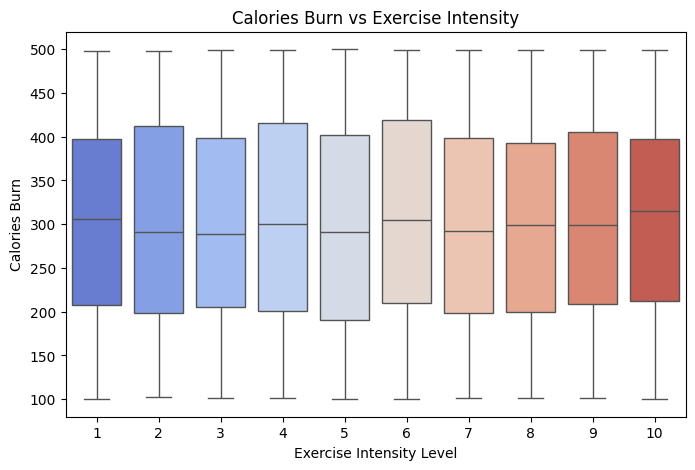

In [15]:
# 5. Relationship between Exercise Intensity and Calories Burn
# --------------------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(x='exercise_intensity', y='calories_burn', data=df, palette='coolwarm')
plt.title('Calories Burn vs Exercise Intensity')
plt.xlabel('Exercise Intensity Level')
plt.ylabel('Calories Burn')
plt.show()

C:\Users\anind\AppData\Local\Temp\ipykernel_42300\2821878791.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='calories_per_min', data=df, ci=None, palette='pastel')
C:\Users\anind\AppData\Local\Temp\ipykernel_42300\2821878791.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='calories_per_min', data=df, ci=None, palette='pastel')


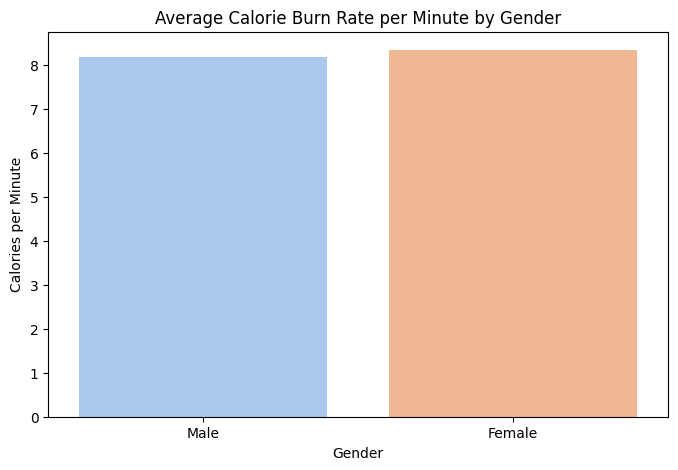

In [16]:
# 6. Gender-based workout performance
# --------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='calories_per_min', data=df, ci=None, palette='pastel')
plt.title('Average Calorie Burn Rate per Minute by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories per Minute')
plt.show()

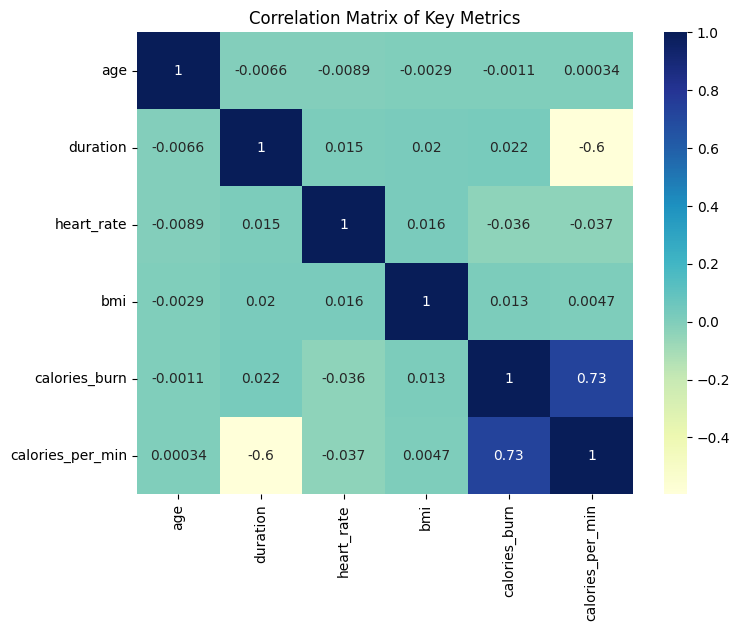

In [17]:
# 7. Correlation analysis
# --------------------------------------------
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of Key Metrics')
plt.show()

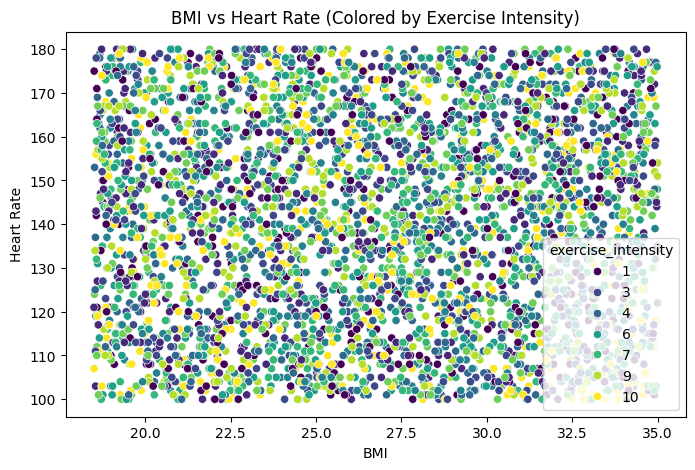

In [18]:
# 8. BMI vs Heart Rate vs Intensity
# --------------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='bmi', y='heart_rate', hue='exercise_intensity', palette='viridis')
plt.title('BMI vs Heart Rate (Colored by Exercise Intensity)')
plt.xlabel('BMI')
plt.ylabel('Heart Rate')
plt.show()

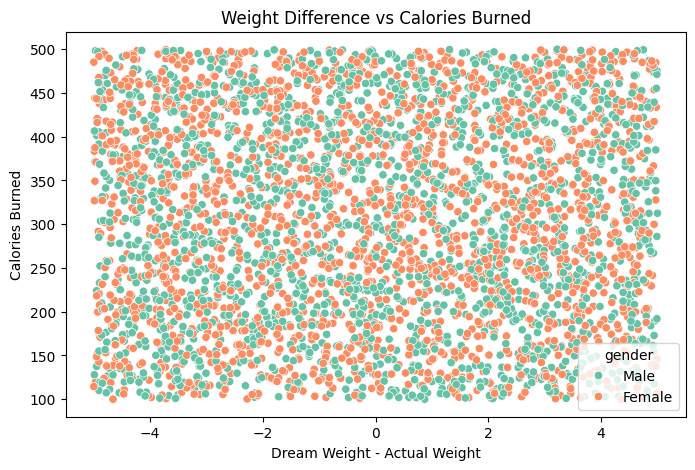

In [19]:
# 9. Weight difference and motivation insight
# --------------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='weight_diff', y='calories_burn', hue='gender', palette='Set2')
plt.title('Weight Difference vs Calories Burned')
plt.xlabel('Dream Weight - Actual Weight')
plt.ylabel('Calories Burned')
plt.show()

C:\Users\anind\AppData\Local\Temp\ipykernel_42300\2467350578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_conditions', y='exercise_intensity', data=df, palette='coolwarm')


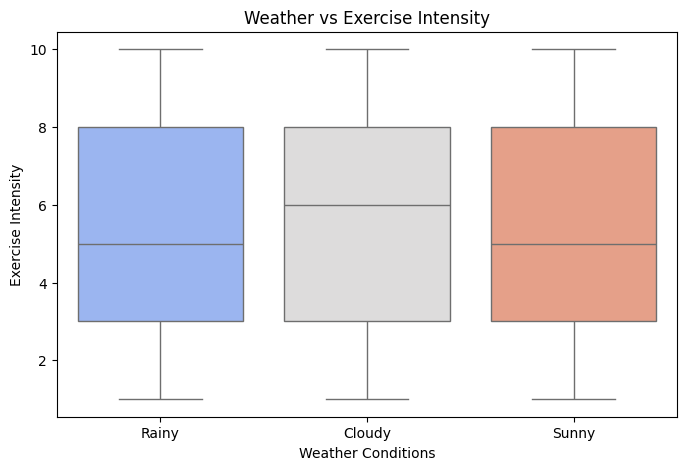

In [20]:
# 10. Weather impact on exercise intensity

plt.figure(figsize=(8,5))
sns.boxplot(x='weather_conditions', y='exercise_intensity', data=df, palette='coolwarm')
plt.title('Weather vs Exercise Intensity')
plt.xlabel('Weather Conditions')
plt.ylabel('Exercise Intensity')
plt.show()

In [21]:
# 11. Insights summary
# --------------------------------------------
print("🔍 Key Insights:")
print("- Higher exercise intensity strongly correlates with calories burned.")
print("- Females show a slightly different calorie efficiency pattern than males.")
print("- Individuals with higher BMI tend to have elevated heart rates during workouts.")
print("- Weight difference (Dream - Actual) could serve as a motivational metric influencing workout intensity.")
print("- Weather conditions seem to have a mild effect — rainy days correlate with slightly lower intensity levels.")

🔍 Key Insights:
- Higher exercise intensity strongly correlates with calories burned.
- Females show a slightly different calorie efficiency pattern than males.
- Individuals with higher BMI tend to have elevated heart rates during workouts.
- Weight difference (Dream - Actual) could serve as a motivational metric influencing workout intensity.
- Weather conditions seem to have a mild effect — rainy days correlate with slightly lower intensity levels.
